In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

In [2]:
import matplotlib.pyplot as plt

In [3]:
user_tag_df = pd.read_csv('dataset/user_taglist.csv', parse_dates=['insertdate'])

user_tag_df.rename(columns={'insertdate': 'tag_insert_date'}, inplace=True)

user_tag_df = user_tag_df.sort_values(by='tag_insert_date', ascending=False).drop_duplicates('user_id').reset_index(drop=True)

In [4]:
user_tag_df.head()

,user_id,taglist,tag_insert_date
0,847942,271|5639|1314|404|2017|631|2365|3576|1804|1541...,2019-03-30
1,13643,2017|3006|1178|2466|1804|1493|70|727|1522|2500...,2019-03-30
2,740882,5682|2117|440|2824|1981|124|393|4926|340|830|2...,2019-03-30
3,905326,2267|1189|1654|5660|5756|298|212|3972|4481|286...,2019-03-30
4,411367,530|42|2682|2596|1100|1279|2073|1180|4749|5269...,2019-03-30


In [5]:
user_tag_df.shape[0]

535380

In [6]:
#user_tag_df['taglist']
#tag_cv = TfidfVectorizer(min_df=10, max_df=0.9).fit_transform(df['taglist'])

In [7]:
tag_lables=[]
for i in range(user_tag_df.shape[0]):
    user_tag_list=user_tag_df['taglist'][i].split('|')
    for j in range(len(user_tag_list)):
        #if j not in tag_lables:
        tag_lables.append(user_tag_list[j])

In [8]:
freqDist = nltk.FreqDist(tag_lables)

In [9]:
freqDist

FreqDist({'2017': 532303, '2710': 520587, '1804': 513388, '1911': 484798, '1654': 472890, '340': 413241, '440': 396984, '70': 361443, '1876': 359593, '5628': 353008, ...})

In [10]:
freqDist=sorted(freqDist.items(),key=lambda x:x[1],reverse=True)
freqDist

[('2017', 532303),
 ('2710', 520587),
 ('1804', 513388),
 ('1911', 484798),
 ('1654', 472890),
 ('340', 413241),
 ('440', 396984),
 ('70', 361443),
 ('1876', 359593),
 ('5628', 353008),
 ('727', 334448),
 ('631', 334141),
 ('2642', 320321),
 ('2300', 313860),
 ('2580', 312155),
 ('719', 300769),
 ('4185', 262623),
 ('1478', 254402),
 ('2164', 253088),
 ('620', 249853),
 ('1100', 241385),
 ('421', 237859),
 ('2365', 237472),
 ('1178', 235779),
 ('2500', 235023),
 ('2431', 233729),
 ('830', 223374),
 ('127', 203236),
 ('2739', 199270),
 ('2540', 189962),
 ('2093', 185127),
 ('1234', 179484),
 ('2018', 178598),
 ('1541', 174391),
 ('691', 171233),
 ('3574', 161931),
 ('2785', 161234),
 ('621', 161208),
 ('469', 159251),
 ('1812', 157081),
 ('1', 155332),
 ('1402', 153869),
 ('389', 148851),
 ('1228', 147445),
 ('1617', 146395),
 ('1900', 145610),
 ('1059', 144246),
 ('2025', 143502),
 ('2212', 138380),
 ('2207', 134319),
 ('4633', 134170),
 ('5682', 133539),
 ('436', 132425),
 ('645', 131

In [11]:
labels = []
frequence_ratio = []
sum_num=535380
for i in range(len(freqDist)):
    labels.append(freqDist[i][0])
    frequence_ratio.append("{0:.5f}".format(freqDist[i][1]/sum_num))
frequence_ratio

['0.99425',
 '0.97237',
 '0.95892',
 '0.90552',
 '0.88328',
 '0.77186',
 '0.74150',
 '0.67511',
 '0.67166',
 '0.65936',
 '0.62469',
 '0.62412',
 '0.59831',
 '0.58624',
 '0.58305',
 '0.56179',
 '0.49054',
 '0.47518',
 '0.47273',
 '0.46668',
 '0.45087',
 '0.44428',
 '0.44356',
 '0.44040',
 '0.43898',
 '0.43657',
 '0.41723',
 '0.37961',
 '0.37220',
 '0.35482',
 '0.34579',
 '0.33525',
 '0.33359',
 '0.32573',
 '0.31983',
 '0.30246',
 '0.30116',
 '0.30111',
 '0.29745',
 '0.29340',
 '0.29013',
 '0.28740',
 '0.27803',
 '0.27540',
 '0.27344',
 '0.27198',
 '0.26943',
 '0.26804',
 '0.25847',
 '0.25089',
 '0.25061',
 '0.24943',
 '0.24735',
 '0.24632',
 '0.24497',
 '0.24049',
 '0.24005',
 '0.23745',
 '0.23708',
 '0.23613',
 '0.23160',
 '0.22766',
 '0.22409',
 '0.22257',
 '0.22183',
 '0.21633',
 '0.21116',
 '0.21028',
 '0.21024',
 '0.20984',
 '0.20919',
 '0.20826',
 '0.20679',
 '0.20250',
 '0.20085',
 '0.19614',
 '0.19538',
 '0.19376',
 '0.18550',
 '0.18473',
 '0.18015',
 '0.17979',
 '0.17960',
 '0.

In [12]:
len(frequence_ratio)

5986

In [13]:
frequence_ratio = list(map(float, frequence_ratio))

In [14]:
new_frequence_ration=dict(zip(labels, frequence_ratio))
new_frequence_ration

{'2017': 0.99425,
 '2710': 0.97237,
 '1804': 0.95892,
 '1911': 0.90552,
 '1654': 0.88328,
 '340': 0.77186,
 '440': 0.7415,
 '70': 0.67511,
 '1876': 0.67166,
 '5628': 0.65936,
 '727': 0.62469,
 '631': 0.62412,
 '2642': 0.59831,
 '2300': 0.58624,
 '2580': 0.58305,
 '719': 0.56179,
 '4185': 0.49054,
 '1478': 0.47518,
 '2164': 0.47273,
 '620': 0.46668,
 '1100': 0.45087,
 '421': 0.44428,
 '2365': 0.44356,
 '1178': 0.4404,
 '2500': 0.43898,
 '2431': 0.43657,
 '830': 0.41723,
 '127': 0.37961,
 '2739': 0.3722,
 '2540': 0.35482,
 '2093': 0.34579,
 '1234': 0.33525,
 '2018': 0.33359,
 '1541': 0.32573,
 '691': 0.31983,
 '3574': 0.30246,
 '2785': 0.30116,
 '621': 0.30111,
 '469': 0.29745,
 '1812': 0.2934,
 '1': 0.29013,
 '1402': 0.2874,
 '389': 0.27803,
 '1228': 0.2754,
 '1617': 0.27344,
 '1900': 0.27198,
 '1059': 0.26943,
 '2025': 0.26804,
 '2212': 0.25847,
 '2207': 0.25089,
 '4633': 0.25061,
 '5682': 0.24943,
 '436': 0.24735,
 '645': 0.24632,
 '676': 0.24497,
 '1831': 0.24049,
 '2250': 0.24005,
 

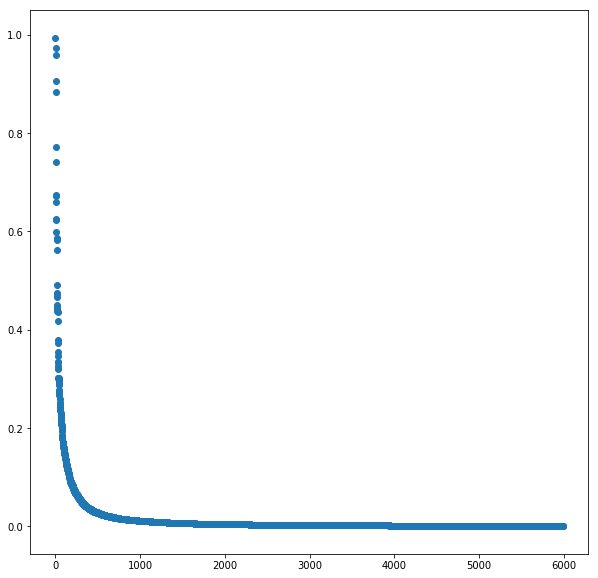

In [15]:
x=[i for i in range(5986)]
plt.figure(figsize=(10,10))
plt.scatter(x,frequence_ratio)

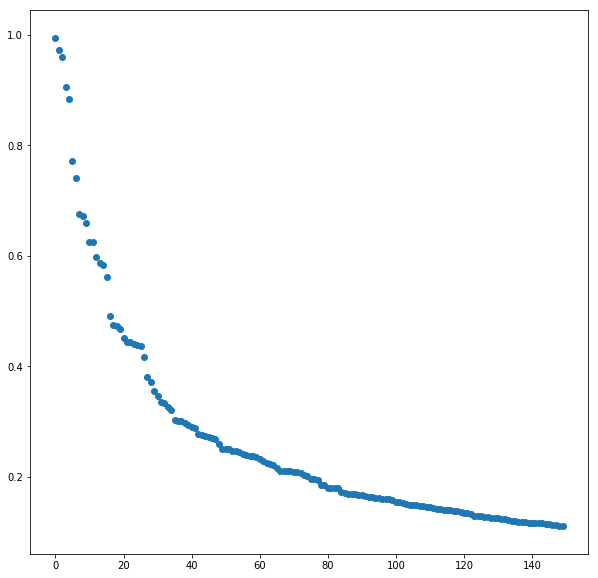

In [16]:
x=[i for i in range(150)]
plt.figure(figsize=(10,10))
plt.scatter(x,frequence_ratio[:150])

In [17]:
target_dic_value=[i for i in frequence_ratio if 0.8>i>0.30]
len(target_dic_value)

33

In [18]:
target_dic={key:value for key,value in new_frequence_ration.items() if 0.3<value<0.8}
target_dic

{'340': 0.77186,
 '440': 0.7415,
 '70': 0.67511,
 '1876': 0.67166,
 '5628': 0.65936,
 '727': 0.62469,
 '631': 0.62412,
 '2642': 0.59831,
 '2300': 0.58624,
 '2580': 0.58305,
 '719': 0.56179,
 '4185': 0.49054,
 '1478': 0.47518,
 '2164': 0.47273,
 '620': 0.46668,
 '1100': 0.45087,
 '421': 0.44428,
 '2365': 0.44356,
 '1178': 0.4404,
 '2500': 0.43898,
 '2431': 0.43657,
 '830': 0.41723,
 '127': 0.37961,
 '2739': 0.3722,
 '2540': 0.35482,
 '2093': 0.34579,
 '1234': 0.33525,
 '2018': 0.33359,
 '1541': 0.32573,
 '691': 0.31983,
 '3574': 0.30246,
 '2785': 0.30116,
 '621': 0.30111}

In [32]:
important_tag=list(target_dic.keys())
important_tag

['340',
 '440',
 '70',
 '1876',
 '5628',
 '727',
 '631',
 '2642',
 '2300',
 '2580',
 '719',
 '4185',
 '1478',
 '2164',
 '620',
 '1100',
 '421',
 '2365',
 '1178',
 '2500',
 '2431',
 '830',
 '127',
 '2739',
 '2540',
 '2093',
 '1234',
 '2018',
 '1541',
 '691',
 '3574',
 '2785',
 '621']

In [19]:
user_tag_df['taglist'] = user_tag_df['taglist'].astype('str').apply(lambda x: x.strip().replace('|', ' ').strip())

In [20]:
user_tag_df['taglist']

0         271 5639 1314 404 2017 631 2365 3576 1804 1541...
1         2017 3006 1178 2466 1804 1493 70 727 1522 2500...
2         5682 2117 440 2824 1981 124 393 4926 340 830 2...
3         2267 1189 1654 5660 5756 298 212 3972 4481 286...
4         530 42 2682 2596 1100 1279 2073 1180 4749 5269...
5         3715 3966 2540 1654 1955 925 1318 1058 44 5467...
6         631 2017 1804 3348 894 3391 727 3784 2500 5641...
7         1831 2168 5756 2739 2538 1876 340 3654 830 440...
8         2164 2707 1654 1478 621 3980 3222 2137 4288 54...
9         934 2180 4737 1942 1693 1179 4312 406 621 2496...
10        978 5948 5628 5690 421 3114 4666 469 320 3574 ...
11        5144 2710 2580 5531 5913 1911 418 1624 1626 11...
12        5589 2800 5983 2245 1900 1478 1654 1904 3116 1...
13        2300 1231 70 2588 2678 631 2413 5628 2365 2017...
14        691 4524 1234 70 467 5628 2762 2981 4229 447 1...
15        4185 2649 4620 5682 1059 440 2540 5664 1964 14...
16        1967 3519 1911 4246 1842 2124 

In [26]:
user_tag_df['taglist']=user_tag_df['taglist'].str.split()

In [27]:
user_tag_df['taglist']

0         [271, 5639, 1314, 404, 2017, 631, 2365, 3576, ...
1         [2017, 3006, 1178, 2466, 1804, 1493, 70, 727, ...
2         [5682, 2117, 440, 2824, 1981, 124, 393, 4926, ...
3         [2267, 1189, 1654, 5660, 5756, 298, 212, 3972,...
4         [530, 42, 2682, 2596, 1100, 1279, 2073, 1180, ...
5         [3715, 3966, 2540, 1654, 1955, 925, 1318, 1058...
6         [631, 2017, 1804, 3348, 894, 3391, 727, 3784, ...
7         [1831, 2168, 5756, 2739, 2538, 1876, 340, 3654...
8         [2164, 2707, 1654, 1478, 621, 3980, 3222, 2137...
9         [934, 2180, 4737, 1942, 1693, 1179, 4312, 406,...
10        [978, 5948, 5628, 5690, 421, 3114, 4666, 469, ...
11        [5144, 2710, 2580, 5531, 5913, 1911, 418, 1624...
12        [5589, 2800, 5983, 2245, 1900, 1478, 1654, 190...
13        [2300, 1231, 70, 2588, 2678, 631, 2413, 5628, ...
14        [691, 4524, 1234, 70, 467, 5628, 2762, 2981, 4...
15        [4185, 2649, 4620, 5682, 1059, 440, 2540, 5664...
16        [1967, 3519, 1911, 4246, 1842,